In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from batch_generator import dataset_train
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from segnet import SegNet

In [15]:
dataloader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size = 5,
    shuffle=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 3, 300, 300)


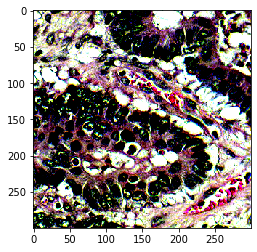

torch.Size([5, 1, 300, 300])


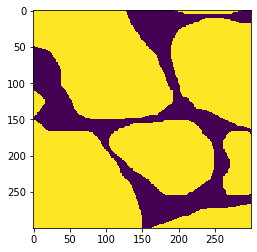

In [16]:
data = [batch_data for batch_data in dataloader_train]
batch_data = data[0]
fig_img = plt.figure()
print(batch_data['image'].numpy().shape)
plt.imshow(batch_data['image'][0].permute(1, 2, 0).numpy())
plt.show()
print(batch_data['annotation'].shape)
batch_data['annotation'] = batch_data['annotation']
plt.imshow(batch_data['annotation'][0][0])
fig_img.suptitle('image')
plt.show()

In [17]:
net = SegNet(3, 1) # input channels, output channels

In [18]:
LEARNING_RATE = 0.001
# criterion = nn.CrossEntropyLoss() for multiple class
criterion = nn.BCEWithLogitsLoss() 

# optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)
# optimizer = optim.SGD(net.parameters(), LEARNING_RATE, momentum=0.9, weight_decay=5e-4)
optimizer = optim.Adam(net.parameters(), 5e-4, (0.9, 0.999),  eps=1e-08, weight_decay=1e-4)

tensor([[[[-1.1279e-01, -1.8936e-02, -2.1926e-01,  ..., -5.3566e-02,
           -1.4130e-01,  1.4565e-01],
          [-6.3446e-02,  1.0532e-01,  5.5952e-02,  ..., -4.8594e-02,
           -1.4734e-01, -3.1818e-01],
          [-2.0702e-01, -2.7865e-01,  3.2228e-01,  ..., -4.6076e-01,
            5.0525e-02, -8.0044e-02],
          ...,
          [-1.6901e-01, -1.1595e-01, -2.5512e-01,  ..., -1.0402e-01,
           -7.9541e-02,  5.5916e-04],
          [-6.5091e-02,  3.7164e-01, -6.1149e-02,  ...,  2.2641e-01,
           -2.0060e-01,  1.3845e-01],
          [-4.5228e-02, -1.8162e-01, -1.1686e-01,  ..., -6.4097e-02,
           -9.8036e-02, -2.4678e-01]]],


        [[[-3.1337e-03, -2.3330e-01,  4.7990e-02,  ..., -8.7106e-02,
           -3.5876e-01,  2.1922e-01],
          [-2.0586e-01, -2.8992e-01,  2.2684e-01,  ..., -4.5961e-01,
           -2.6279e-01, -2.8034e-01],
          [ 2.8039e-01, -3.9622e-01,  8.7849e-03,  ...,  1.6986e-01,
            2.6162e-01, -1.2259e-01],
          ...,
   

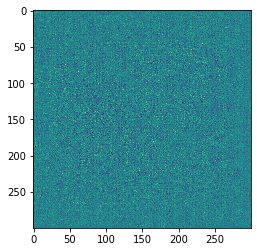

In [19]:
batch_data = data[0]
output = net(batch_data['image'])
anno = batch_data['annotation']
# anno = anno.view(-1, anno.shape[2], anno.shape[3]).long()
print(output)
print('output shape', output.shape)
print('anno', anno)
batch_loss = criterion(output, anno)
print(batch_loss.data.numpy())
plt.imshow(output[0][0].detach().numpy())
plt.show()

train loss:  0.7148382067680359
train loss:  0.7078213095664978
train loss:  0.7156323194503784
train loss:  0.6857168078422546


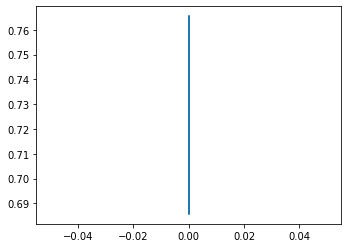

Train, it: 0 loss: 0.71
train loss:  0.6995559930801392
train loss:  0.6995347142219543
train loss:  0.6897783279418945


In [ ]:
max_iter = 3
log_every = 100
eval_every = 100

# Initialize lists for training and validation
train_iter = []
train_loss, train_accs = [], []
valid_iter = []
valid_loss, valid_accs = [], []

# Train network
net.train()
for i in range(max_iter):
    for j, batch_train in enumerate(dataloader_train):
        # Train
        inputs = batch_train['image']
        anno = batch_train['annotation']
#         anno = anno.view(-1, anno.shape[2], anno.shape[3]).long()
        output = net(inputs)
        batch_loss = criterion(output, anno)

        train_iter.append(i)
        b_loss = float(batch_loss.data.numpy())
        train_loss.append(b_loss)

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        if j % 5 == 0:
            print("train loss: ", train_loss[-1])

    fig = plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(train_iter, train_loss, label='train_loss')
#     plt.plot(valid_iter, valid_loss, label='valid_loss')
    plt.show()

#     plt.subplot(1, 2, 2)
#     plt.plot(train_iter, train_accs, label='train_accs')
#     plt.plot(valid_iter, valid_accs, label='valid_accs')
#     plt.legend()
#     plt.show()
#         clear_output(wait=True)
    print("Train, it: {} loss: {:.2f}".format(i, train_loss[-1]))


In [ ]:
batch_data = data[0]
fig_img = plt.figure()
inputs = batch_data['image']
anno = batch_data['annotation']
output = net(inputs)
print('input shape:', inputs.shape)
plt.imshow(inputs[0].permute(1, 2, 0).numpy())
plt.show()
print('anno shape:', anno.shape)
print(anno)
plt.imshow(anno[0][0])
plt.show()
fig_img.suptitle('image')
print('output shape:', output.shape)
plt.imshow(output[0][0].detach().numpy())
print(output)
plt.show()

In [ ]:
loss = criterion(output, anno)
print(loss.detach().numpy())